In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [3]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
submission_df = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape

(42000, 785)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
train_df.isna().sum().sum()

0

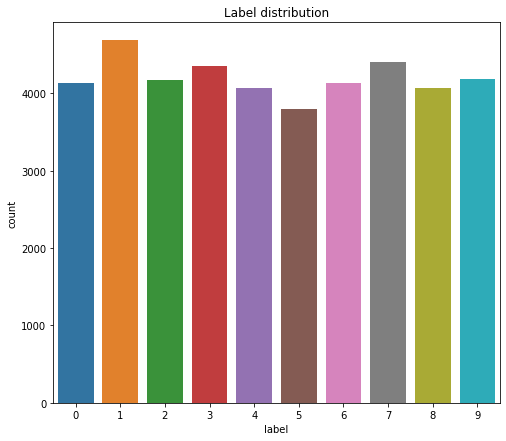

In [8]:
# Let's see the class distribution balanced or not

plt.figure(figsize=(8,7))
sns.countplot(x="label", data=train_df)
plt.title("Label distribution")
plt.show()

In [9]:
train_df.values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [10]:
train_df.values[0]

array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
train_df.values[:, :1]

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

In [12]:
train_df.values[:, 1:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
# Divide the dataset into features and target

X = train_df.values[:, 1:]
y = train_df.values[:, :1]

In [14]:
X.shape

(42000, 784)

In [15]:
y.shape

(42000, 1)

In [16]:
# Scaling all pixel value for bring the same range between 0 to 1

X_scale = X / 255.

In [17]:
print("Max value: ", X_scale.max())
print("Max value: ", X_scale.min())

Max value:  1.0
Max value:  0.0


In [18]:
print(X_scale.shape[1])
print(np.sqrt(X_scale.shape[1]))
print(int(np.sqrt(X_scale.shape[1])))

784
28.0
28


In [19]:
dim = int(np.sqrt(X_scale.shape[1]))
dim

28

In [20]:
N = X_scale.shape[0]
N

42000

In [21]:
X_scale = X_scale.reshape((N, dim, dim, 1)) # Make 28 x 28 image

In [22]:
X_scale

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [23]:
X_scale[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [24]:
y = to_categorical(y=y)

In [25]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [26]:
print(f"X.shape={X_scale.shape}, Y.shape={y.shape}")

X.shape=(42000, 28, 28, 1), Y.shape=(42000, 10)


# Let's create Model

In [27]:
# x_train, x_test, y_train, y_test = train_test_split(X_scale, y, train_size=0.8, random_state=2)

x_train, x_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=2)

In [28]:
x_train.shape

(33600, 28, 28, 1)

In [29]:
model = Sequential()

model.add(layer=Conv2D(filters=16, kernel_size=(3,3), padding="same", strides=(1,1), activation="relu", input_shape=(28,28,1)))
model.add(layer=Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=(1,1), activation="relu"))
model.add(layer=MaxPooling2D(pool_size=(2,2), strides=(2,2))) # pooled features size = 14 x 14 x 32
model.add(layer=Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=(1,1), activation="relu"))
model.add(layer=MaxPooling2D(pool_size=(2,2), strides=(2,2))) # pooled features size = 7 x 7 x 64
model.add(layer=Dropout(rate=0.3)) # to reduce the overfit condition
model.add(layer=Flatten()) # to convert multidimantation to one dimantation for Dense layers
model.add(layer=Dense(units=256, activation="relu"))
model.add(layer=Dropout(rate=0.1)) # to reduce the overfit condition
model.add(layer=Dense(units=128, activation="relu"))
model.add(layer=Dense(units=10, activation="softmax")) # For multi-class classification

2022-09-08 10:00:32.157264: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

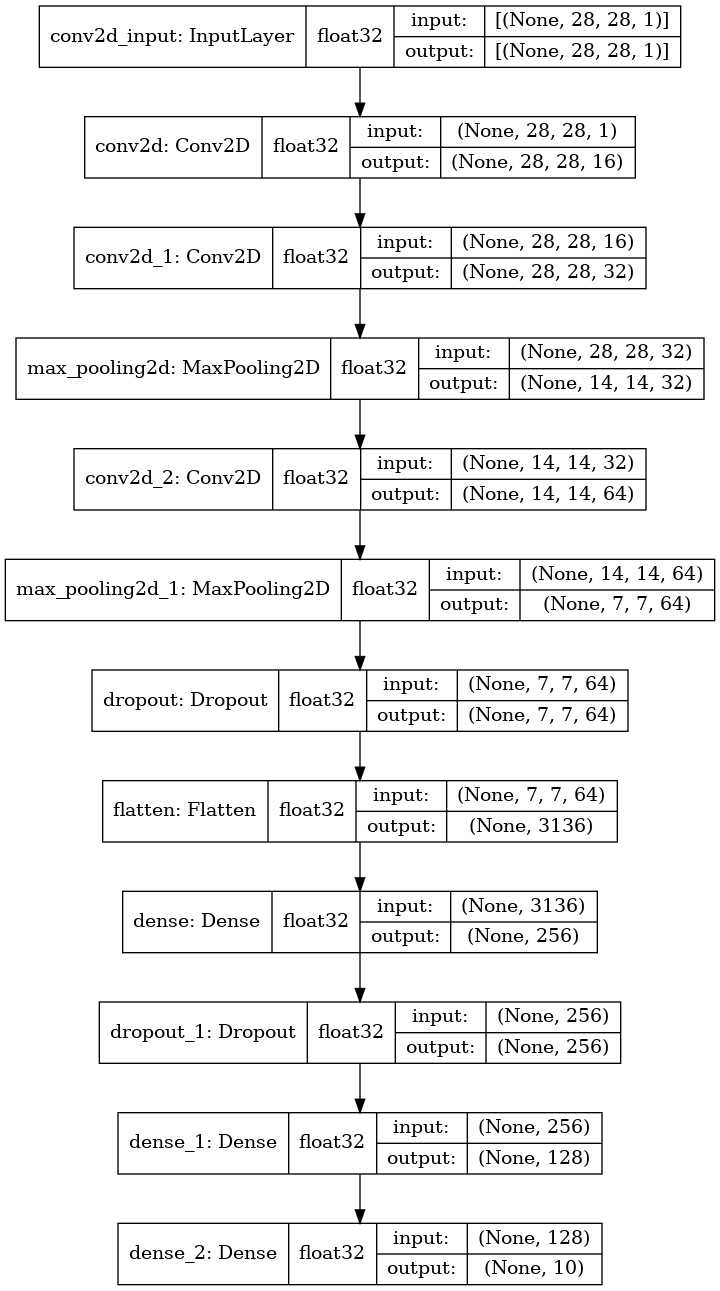

In [31]:
# tf.keras.utils.plot_model(model=model, show_shapes=True, show_dtype=True,expand_nested=True)

tf.keras.utils.plot_model(model=model, show_shapes=True, show_dtype=True)

In [32]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses

In [33]:
# model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=['accuracy'])
# model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])

model.compile(optimizer=optimizers.Adam(), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

# model.compile(optimizer=optimizers.Adam(), loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [34]:
history = model.fit(x=x_train, y=y_train, epochs=15, validation_split=0.2)

2022-09-08 10:00:34.123095: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
840/840 [==============================] - 27s 31ms/step - loss: 0.0504 - accuracy: 0.9082 - val_loss: 0.0114 - val_accuracy: 0.9815
Epoch 2/15
840/840 [==============================] - 24s 28ms/step - loss: 0.0124 - accuracy: 0.9805 - val_loss: 0.0090 - val_accuracy: 0.9859
Epoch 3/15
840/840 [==============================] - 24s 29ms/step - loss: 0.0087 - accuracy: 0.9867 - val_loss: 0.0078 - val_accuracy: 0.9879
Epoch 4/15
840/840 [==============================] - 24s 29ms/step - loss: 0.0066 - accuracy: 0.9897 - val_loss: 0.0074 - val_accuracy: 0.9891
Epoch 5/15
840/840 [==============================] - 24s 29ms/step - loss: 0.0059 - accuracy: 0.9909 - val_loss: 0.0083 - val_accuracy: 0.9881
Epoch 6/15
840/840 [==============================] - 25s 30ms/step - loss: 0.0046 - accuracy: 0.9934 - val_loss: 0.0099 - val_accuracy: 0.9853
Epoch 7/15
840/840 [==============================] - 24s 29ms/step - loss: 0.0040 - accuracy: 0.9937 - val_loss: 0.0088 - val_accuracy:

In [35]:
score = model.evaluate(x=x_test, y=y_test)

263/263 [==============================] - 3s 12ms/step - loss: 0.0087 - accuracy: 0.9898


In [36]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.008668787777423859
Test accuracy: 0.9897618889808655


In [37]:
y_pred = model.predict(x=x_test)

In [38]:
y_pred

array([[9.28941819e-19, 7.18709834e-20, 4.64056026e-24, ...,
        1.24413746e-27, 1.24478376e-26, 1.77841408e-22],
       [3.86121968e-14, 3.98404445e-15, 7.17798217e-14, ...,
        1.07255507e-11, 5.14930763e-12, 1.00000000e+00],
       [1.31303189e-30, 3.93718436e-27, 3.05917541e-29, ...,
        1.91469617e-30, 1.02025344e-28, 2.05176562e-22],
       ...,
       [4.31548130e-28, 1.34807771e-22, 8.25050146e-25, ...,
        3.15192656e-23, 2.12587267e-27, 7.05347221e-26],
       [1.00194664e-09, 1.56063565e-11, 9.36104560e-15, ...,
        1.50601876e-15, 4.41166819e-15, 3.92177068e-14],
       [5.73281194e-19, 1.01764660e-18, 3.44646457e-18, ...,
        4.78534365e-18, 4.24382102e-17, 1.00000000e+00]], dtype=float32)

In [39]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([6, 9, 5, ..., 3, 6, 9])

In [40]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [41]:
y_test_labels = np.argmax(y_test, axis=1)
y_test_labels

array([6, 9, 5, ..., 3, 6, 9])

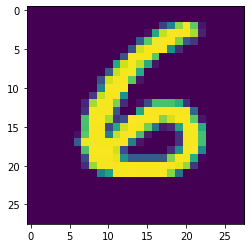

In [42]:
plt.imshow(x_test[0].reshape(28,28))

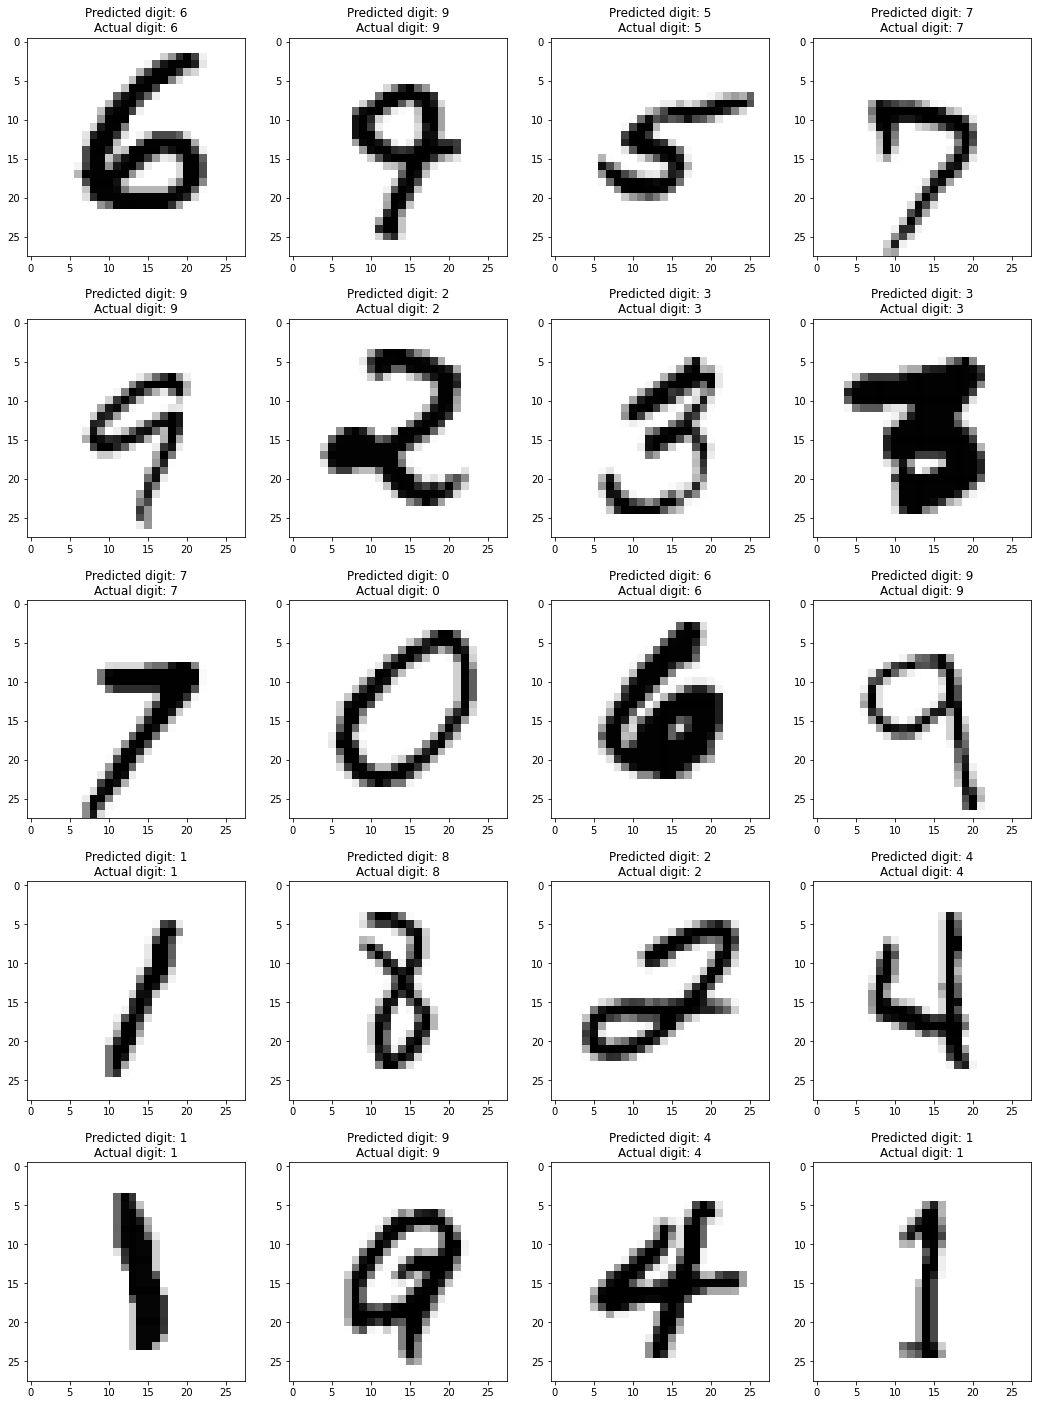

In [43]:
# compare our result

fig, axis = plt.subplots(5, 4, figsize=(18,25))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i].reshape(28,28), cmap="binary")
    ax.set(title="Predicted digit: {0}\nActual digit: {1}".format(y_pred_labels[i], y_test_labels[i]))

In [44]:
from sklearn.metrics import confusion_matrix

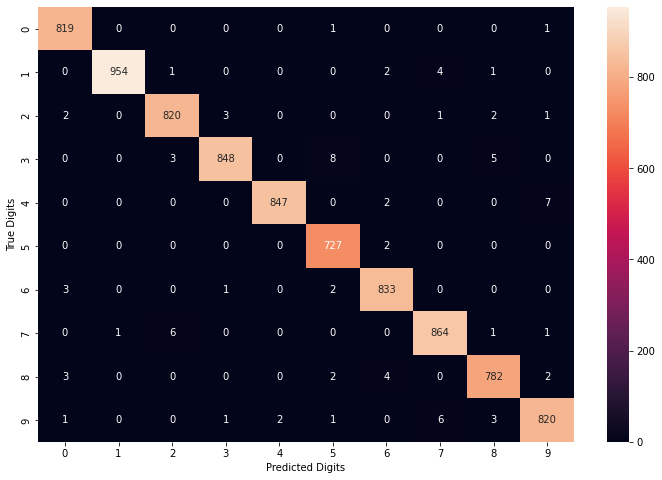

In [45]:
cm = confusion_matrix(y_true=y_test_labels, y_pred=y_pred_labels)

plt.figure(figsize=(12, 8))
sns.heatmap(data=cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [46]:
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv", sep=",", header=0)
values = df_test.values
test_X_flat = df_test.values
test_X_flat = test_X_flat / 256
print(f"{test_X_flat.shape}")
real_test_X = test_X_flat.reshape((-1, dim, dim, 1))
print(f"{real_test_X.shape}")

(28000, 784)
(28000, 28, 28, 1)


# Let's test our model with the test datasets

In [47]:
test_x = test_df.values / 255.

In [48]:
test_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
test_x.shape

(28000, 784)

In [50]:
test_x = test_x.reshape(-1, dim, dim, 1)
test_x.shape

(28000, 28, 28, 1)

In [51]:
test_pred = model.predict(x=test_x)

In [52]:
test_pred

array([[6.8739698e-23, 1.2543567e-24, 1.0000000e+00, ..., 4.0992070e-22,
        5.7304421e-22, 1.3948613e-21],
       [1.0000000e+00, 3.3826319e-16, 8.0719688e-16, ..., 3.5092091e-14,
        6.1857327e-17, 1.5653220e-11],
       [8.8282216e-19, 3.0023008e-18, 1.2556686e-16, ..., 3.6681705e-17,
        7.0432867e-17, 1.0000000e+00],
       ...,
       [5.4978766e-28, 9.0340086e-23, 9.4188474e-25, ..., 8.8081886e-23,
        1.5314365e-27, 8.8810572e-25],
       [3.8243731e-11, 1.7374522e-11, 2.5761570e-11, ..., 2.1869118e-10,
        6.0685616e-11, 1.0000000e+00],
       [7.8269965e-23, 8.4194612e-24, 1.0000000e+00, ..., 3.7208717e-21,
        1.7173063e-21, 3.2622580e-21]], dtype=float32)

In [53]:
test_pred_labels = np.argmax(test_pred, axis=1)
test_pred_labels

array([2, 0, 9, ..., 3, 9, 2])

In [54]:
test_pred_labels.shape

(28000,)

In [55]:
submission_df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [56]:
submission_df['Label'].shape

(28000,)

In [57]:
submission_df['Label'] = test_pred_labels

In [58]:
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [59]:
submission_df.to_csv("submission.csv", index=False)